In [3]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yp

In [8]:
import yfinance


start = '2012-01-01'
end = '2022-12-21'

stock = 'GOOG'
data = yfinance.download(stock,start,end)

C:\Users\Parthipan\AppData\Local\Temp\ipykernel_22392\681139893.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yfinance.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [10]:
data.reset_index(inplace=True)
data.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,GOOG,GOOG,GOOG,GOOG,GOOG
0,0,2012-01-03,16.475197,16.543039,16.152333,16.166447,147611217
1,1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2,2012-01-05,16.316738,16.439545,16.247907,16.393988,131808205
3,3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,4,2012-01-09,15.411778,16.019377,15.381324,16.006995,233776981


In [11]:
ma_100_days = data.Close.rolling(100).mean()

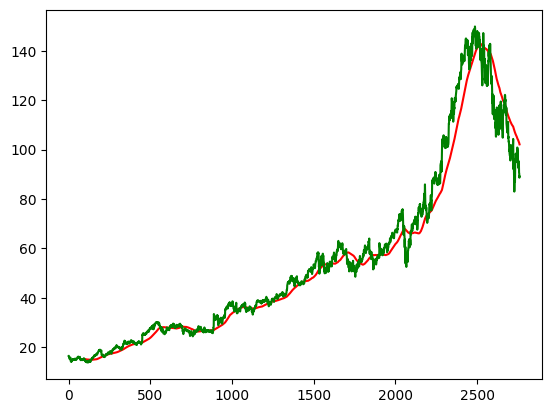

In [12]:
plt.Figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [13]:
ma_200_days = data.Close.rolling(200).mean()

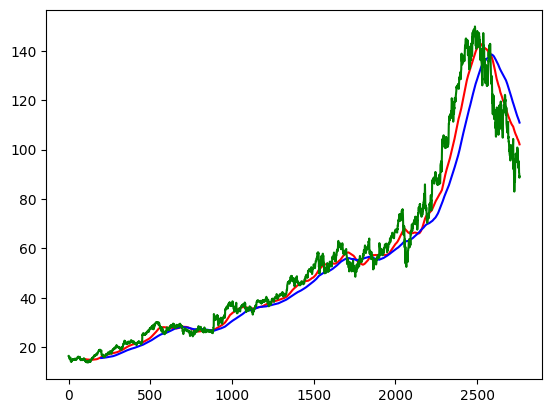

In [14]:
plt.Figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [15]:
data.dropna(inplace=True)

In [16]:
data_train =pd.DataFrame( data.Close[0: int(len(data)*0.80)])
data_test =pd.DataFrame(data.Close[int(len(data)*0.80) :len(data)])

In [17]:
data_train.shape[0]

2208

In [18]:
data_test.shape[0]

553

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [21]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN

# Define the shape of your input
timesteps = 10   # number of time steps per sample
features = 5     # number of features per time step




In [30]:
x,  y = np.array(x), np.array(y)

In [35]:
model = Sequential()
model.add(LSTM(units= 50, activation = 'relu', return_sequences=True,
               input_shape =((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model.fit(x,y, epochs=50 , batch_size=32 , verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - loss: 0.0743
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0597
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0584
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0580
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0572
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0568
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0568
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0562
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0562
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0561
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0560
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - loss: 0.0558
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0558
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 0.0557
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss:

In [38]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [39]:
pas_100_days = data_train.tail(100)

In [40]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)
data_test

Ticker,GOOG
0,69.920387
1,69.725540
2,70.104301
3,70.432343
4,70.473099
...,...
648,94.746803
649,90.661095
650,90.323105
651,88.623207


In [41]:
from sklearn.preprocessing import StandardScaler  

  
data_test_scale = scaler.fit_transform(data_test)

In [42]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x,y = np.array(x), np.array(y) 

In [43]:
y_predict = model.predict(x)
y_predict

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step


array([[[0.35690916],
        [0.3658147 ],
        [0.3662011 ],
        ...,
        [0.3621903 ],
        [0.36219028],
        [0.36219025]],

       [[0.35691288],
        [0.3658175 ],
        [0.3662029 ],
        ...,
        [0.36219028],
        [0.36219025],
        [0.36219025]],

       [[0.3569014 ],
        [0.36580834],
        [0.3661961 ],
        ...,
        [0.36219025],
        [0.36219025],
        [0.3621902 ]],

       ...,

       [[0.36198884],
        [0.37353396],
        [0.373005  ],
        ...,
        [0.37035277],
        [0.37033942],
        [0.3703302 ]],

       [[0.36202532],
        [0.37356237],
        [0.37303373],
        ...,
        [0.37033942],
        [0.3703302 ],
        [0.3703232 ]],

       [[0.36198986],
        [0.37358433],
        [0.37306362],
        ...,
        [0.3703302 ],
        [0.3703232 ],
        [0.37031972]]], shape=(2108, 100, 1), dtype=float32)

In [44]:
scale = 1/scaler.scale_

In [45]:
y_predict =y_predict*scale

In [46]:
y=y*scale

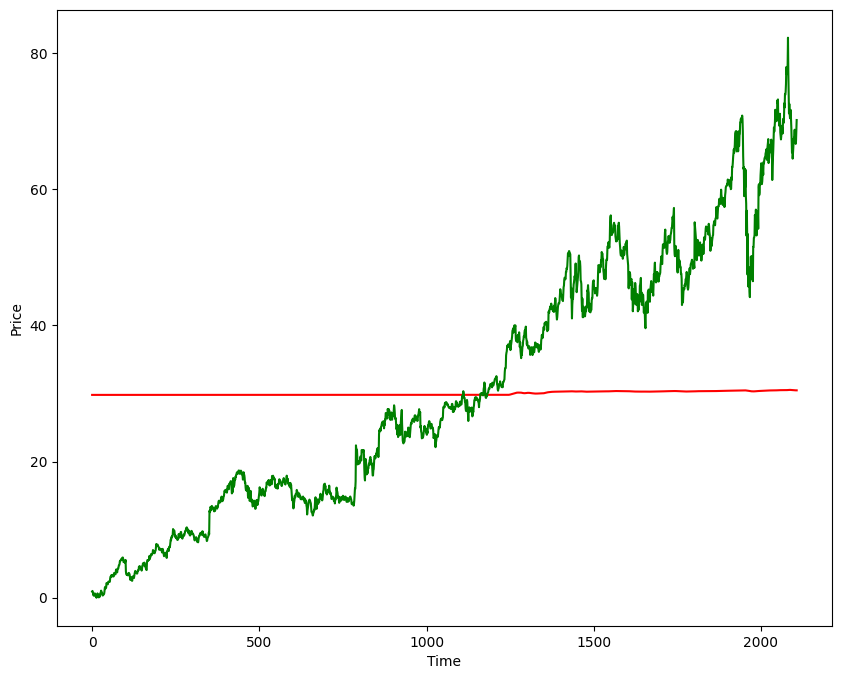

In [47]:
y_predict_flat = y_predict[:, -1, 0] 
plt.figure(figsize=(10,8))
plt.plot(y_predict_flat, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')

plt.show()

In [48]:
model.save('Stock Predictions Model.keras')